In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


In [3]:
df1 = pd.read_csv('bank_additional_full.csv', delimiter= ';')
df1
df1['education'] = df1['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], [1,2,3,4,5,6,7,8])

df1['job'] = df1['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])


df1['housing'] = df1['housing'].replace(['no', 'yes', 'unknown'], [1,2,3])
df1['loan'] = df1['loan'].replace(['no', 'yes', 'unknown'], [1,2,3])
df1['marital'] = df1['marital'].replace(['married', 'single', 'divorced', 'unknown'], [1,2,3,4])
df1['poutcome'] = df1['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3])
df1['month'] = df1['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr','sep'], [1,2,3,4,5,6,7,8,9,10])
df1['day_of_week'] = df1['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1,2,3,4,5])
df1['contact'] = df1['contact'].replace(['telephone', 'cellular'], [1,2])
df1['y'] = df1['y'].replace(['no', 'yes'], [0,1])
df1['job'] = df1['job'].replace(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])
df1['education'] = df1['education'].replace(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], [1,2,3,4,5,6,7,8])
df1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,no,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,unknown,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,no,2,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,no,1,1,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,no,1,2,1,1,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,no,2,1,2,6,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,no,1,1,2,6,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,no,2,1,2,6,5,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,no,1,1,2,6,5,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [4]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df1 = df1.drop(['default'],axis = 1)
df1 = df1.drop(['pdays'],axis = 1)


In [6]:
df1

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,1,261,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,1,2,1,1,1,1,1,149,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,1,2,2,1,1,1,1,226,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,1,3,1,1,1,1,1,151,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,1,2,1,2,1,1,1,307,1,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,1,2,6,5,334,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,1,2,6,5,383,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,6,1,7,2,1,2,6,5,189,2,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,5,1,5,1,1,2,6,5,442,1,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


In [7]:
col_names = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact','month', 'day_of_week', 'duration', 'campaign', 'emp.var.rate',
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']
for col in col_names:
    mode_value = df1[col].mode().values
    df1[col].fillna(mode_value[0], inplace = True)

In [8]:
col_name = ['cons.price.idx']
for col in col_name:
    mode_value = df1[col].mode().values
    df1[col].fillna(mode_value[0], inplace = True)

In [9]:
def scaler_from_0to1(series):
     return (series - series.min()) / (series.max() - series.min())

In [10]:
for col in col_name:
    df1[col] = scaler_from_0to1(df1[col])
df1

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,1,1,1,1,1,1,261,1,0,1,1.1,0.698753,-36.4,4.857,5191.0,0
1,57,2,1,2,1,1,1,1,1,149,1,0,1,1.1,0.698753,-36.4,4.857,5191.0,0
2,37,2,1,2,2,1,1,1,1,226,1,0,1,1.1,0.698753,-36.4,4.857,5191.0,0
3,40,3,1,3,1,1,1,1,1,151,1,0,1,1.1,0.698753,-36.4,4.857,5191.0,0
4,56,2,1,2,1,2,1,1,1,307,1,0,1,1.1,0.698753,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,5,2,1,2,6,5,334,1,0,1,-1.1,1.000000,-50.8,1.028,4963.6,1
41184,46,4,1,5,1,1,2,6,5,383,1,0,1,-1.1,1.000000,-50.8,1.028,4963.6,0
41185,56,6,1,7,2,1,2,6,5,189,2,0,1,-1.1,1.000000,-50.8,1.028,4963.6,0
41186,44,5,1,5,1,1,2,6,5,442,1,0,1,-1.1,1.000000,-50.8,1.028,4963.6,1


In [11]:
for col in df1.columns:
    df1[col] = df1[col].astype('float',errors = 'raise')

Visualization

In [12]:
df1.describe()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.673691,1.510634,4.277532,1.571914,1.199767,1.634748,3.250097,2.979581,258.285010,2.567593,0.172963,1.169904,0.081886,0.535723,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,2.454116,0.696779,2.185525,0.541209,0.456002,0.481507,2.429079,1.411514,259.279249,2.770014,0.494901,0.455754,1.570960,0.225581,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-3.400000,0.000000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,102.000000,1.000000,0.000000,1.000000,-1.800000,0.340608,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,4.000000,1.000000,4.000000,2.000000,1.000000,2.000000,3.000000,3.000000,180.000000,2.000000,0.000000,1.000000,1.100000,0.603274,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,5.000000,2.000000,7.000000,2.000000,1.000000,2.000000,4.000000,4.000000,319.000000,3.000000,0.000000,1.000000,1.400000,0.698753,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,12.000000,4.000000,8.000000,3.000000,3.000000,2.000000,10.000000,5.000000,4918.000000,56.000000,7.000000,3.000000,1.400000,1.000000,-26.900000,5.045000,5228.100000,1.000000


Plot on distribution of education

<AxesSubplot:xlabel='education'>

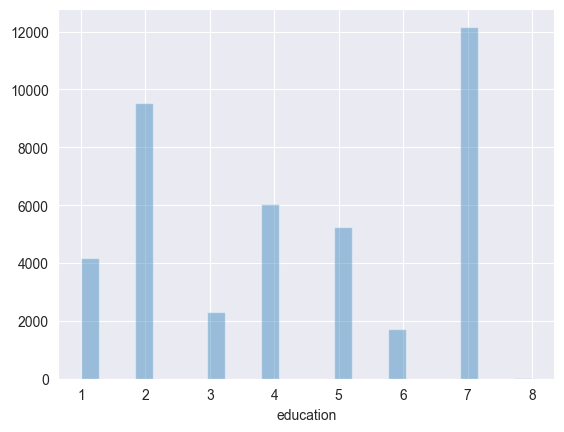

In [13]:
sns.distplot( df1['education'], kde=False)


cons.price.idx: The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods.
Poutcome: outcome of the previous marketing campaign (categorical:'failure','nonexistent','success')

Plot on how rise in CPI impacts outcome of the phone based direct marketing campaign outcomes

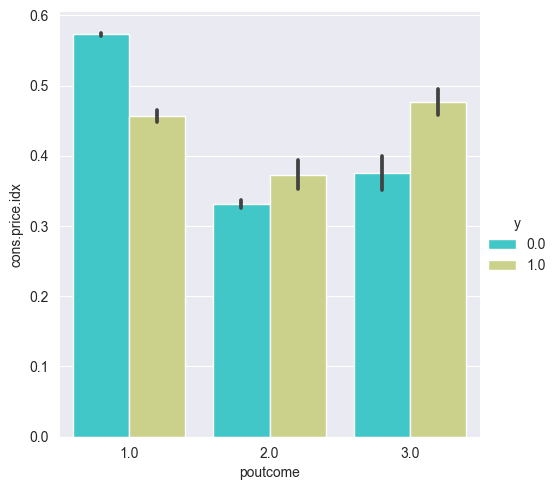

In [14]:
sns.catplot(x="poutcome", y="cons.price.idx", hue="y", kind = 'bar',data=df1, palette = "rainbow")

Based on Age of an individual and their educational background, the plot shows whether if the contact has a personal loan

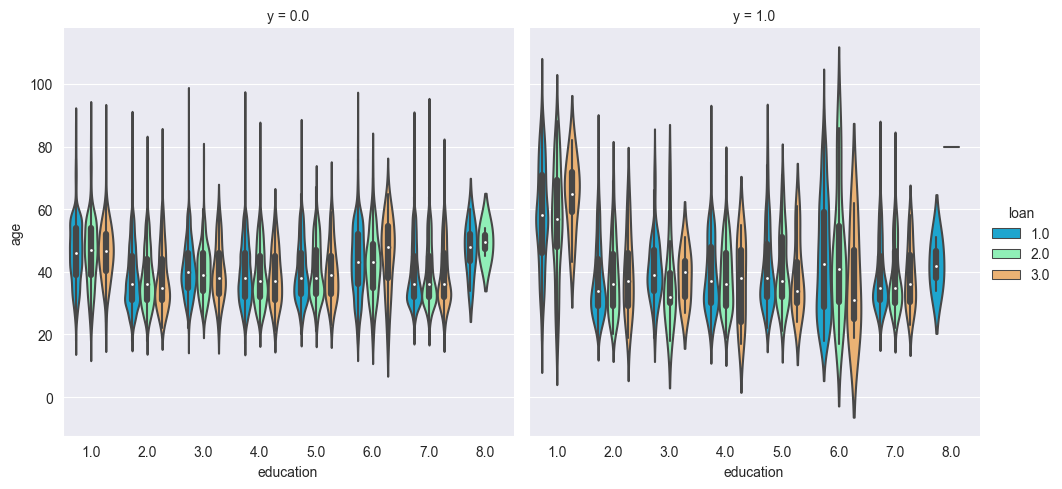

In [15]:
sns.catplot(x="education", y="age", hue="loan",col="y", kind = 'violin',data=df1, palette = "rainbow")

The following graph show cases the impact on output based on the call duration on each campaign phone call.

<AxesSubplot:xlabel='y', ylabel='duration'>

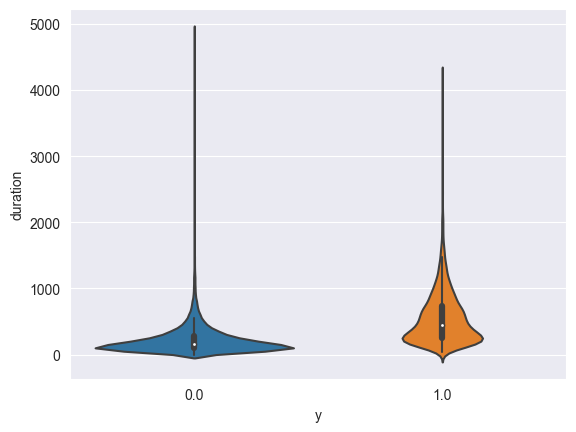

In [16]:
sns.violinplot(x='y', y='duration',data=df1)


This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings.

The score is relative to 1985, so anything above 100 means consumers feel more optimistic about the economy than they did in 1985 and anything below 100 means they feel less confident than in 1985.

The following graph shows how marital status impacts the customer sentiment about the economic systems.

['married', 'single', 'divorced', 'unknown'], [1,2,3,4]

df1['cons.conf.idx'].unique() ranges from [-35 to -50]

<AxesSubplot:xlabel='marital', ylabel='cons.conf.idx'>

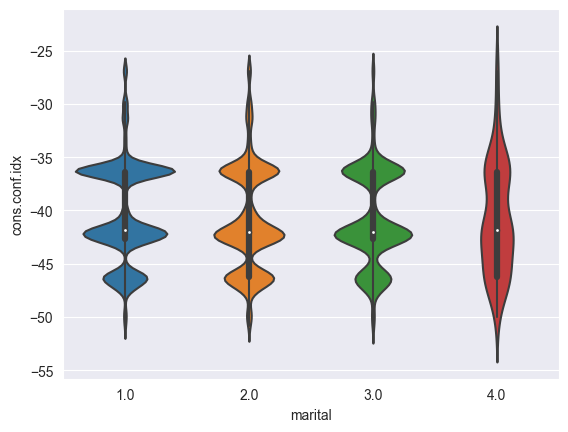

In [17]:
sns.violinplot(x='marital', y='cons.conf.idx',data=df1)


In [18]:
#sns.pairplot(df1, hue="y")


The following graph show cases the call duration on each campaign phone call based on individuals of different age groups is proportionate to their interest to know more details about the campaign  to subscribe to a term deposit.

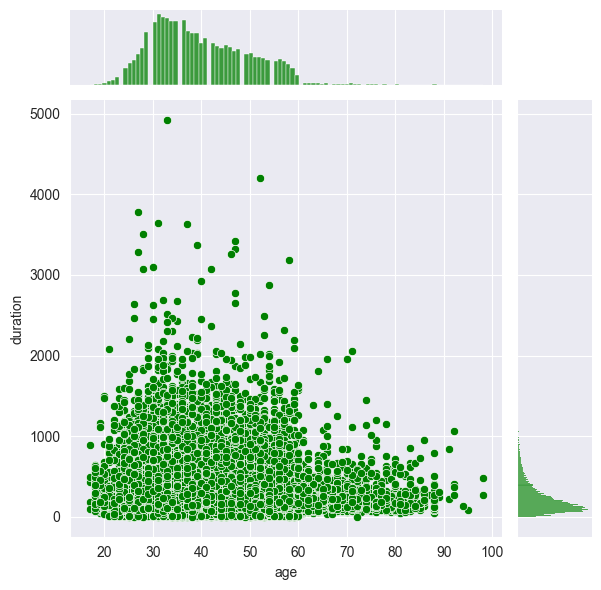

In [19]:
sns.jointplot(x="age", y="duration", data=df1, color ='green')


The following graph shows the subsription status of the candidates according to the type of job at a specific age.

JOB: ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12]

result: It looks like 'admin.', 'blue-collar', 'technician' job type candidates didn't show interest to subscribe and age group 40 to 60 being an entrepreneur, self-employed, retired opted IN

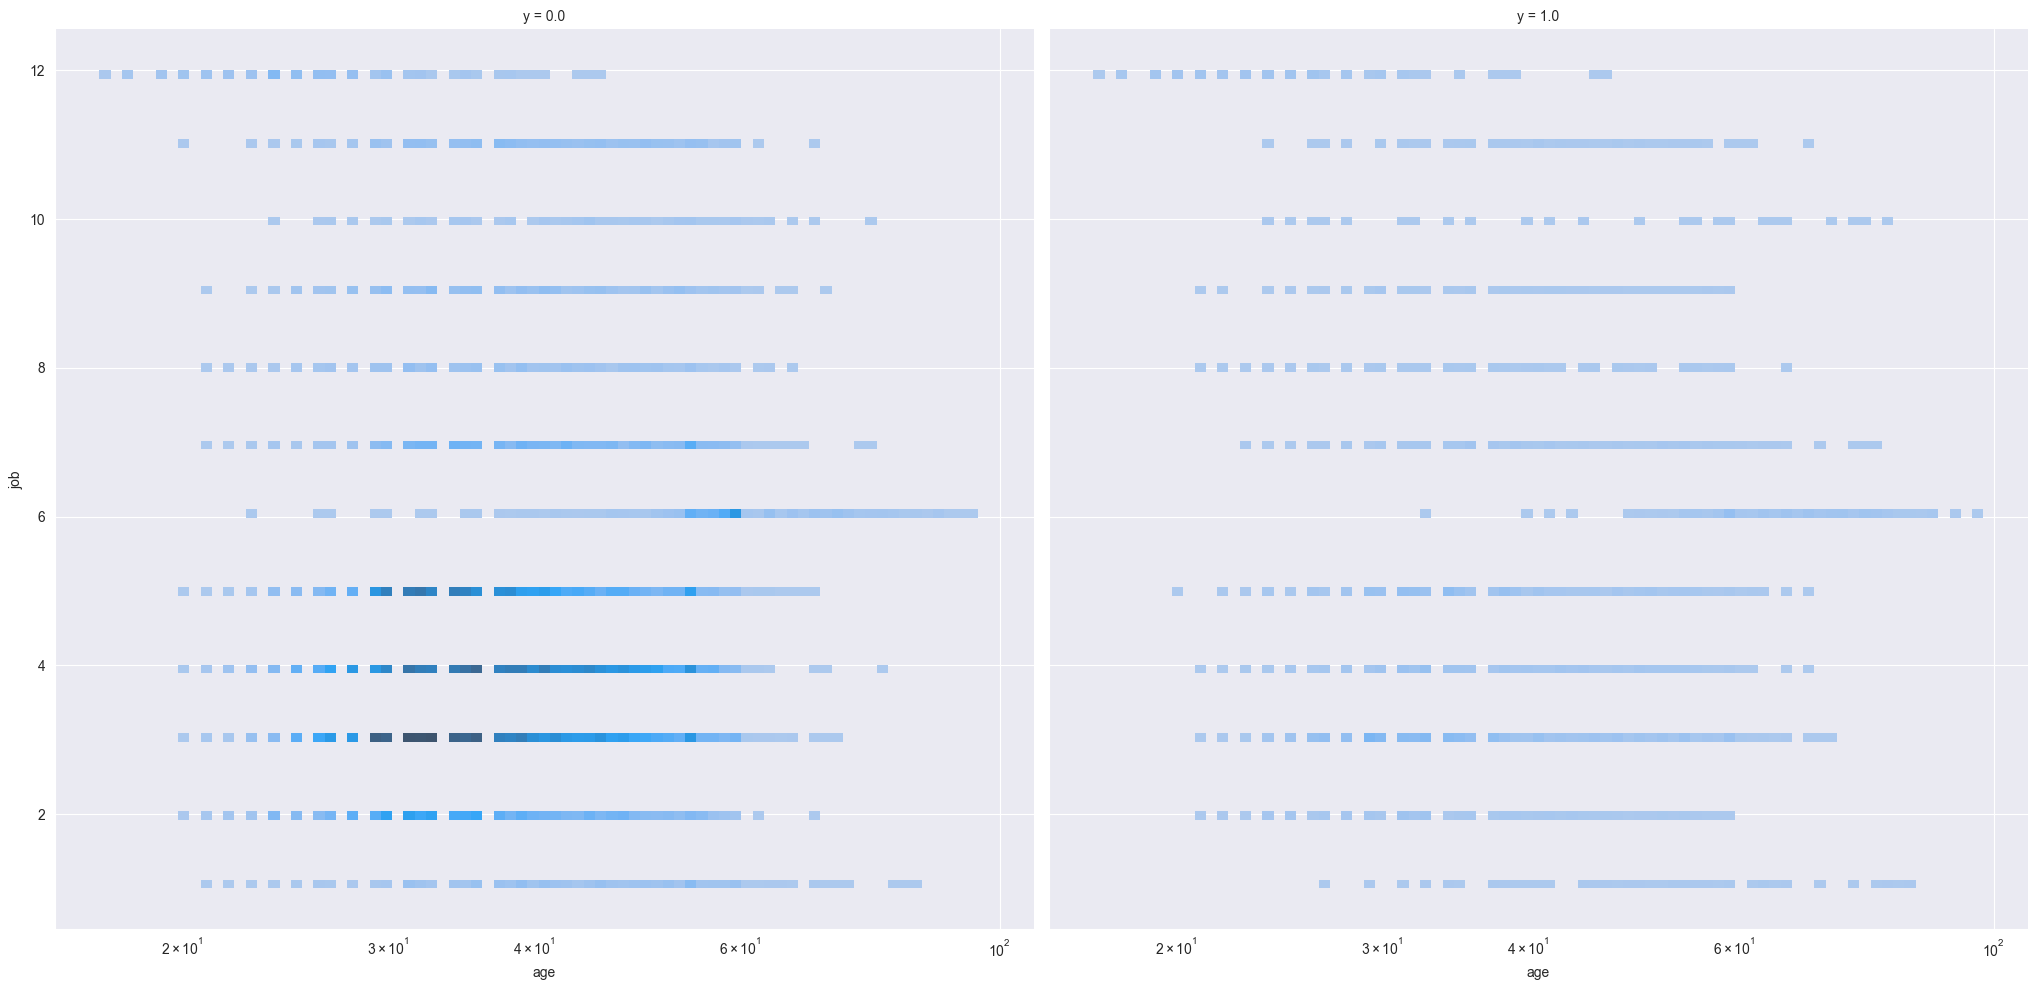

In [20]:
sns.displot(
    data=df1, x="age", y="job", col="y",
    log_scale=(True, False), col_wrap=10, height=10, aspect=1,
)


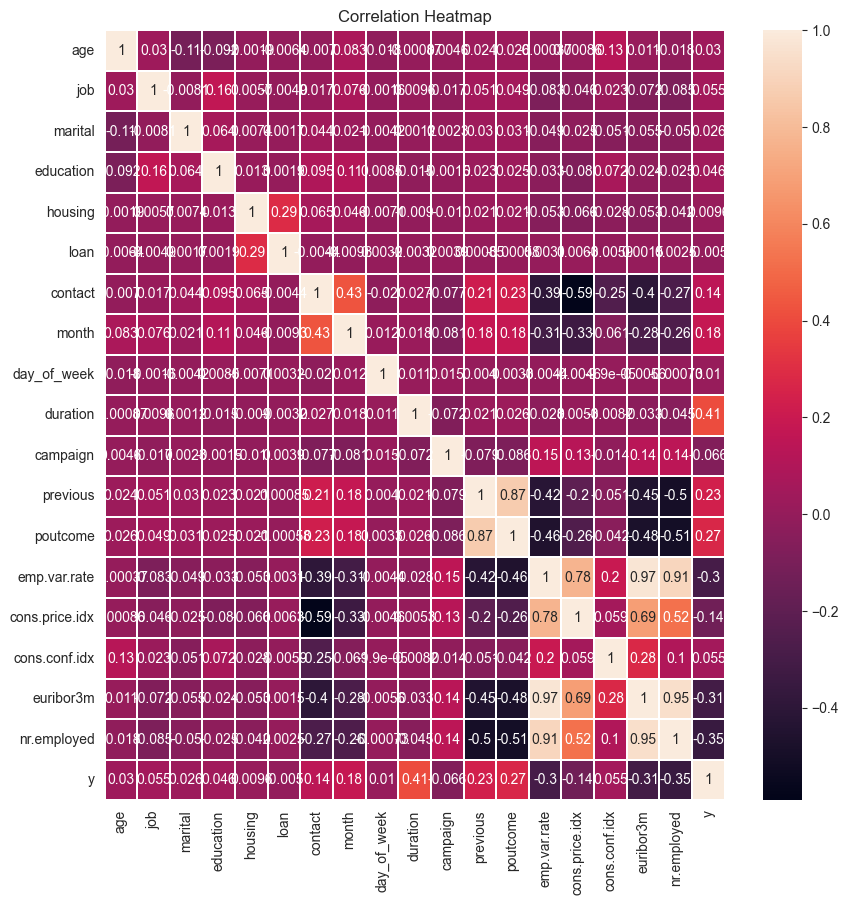

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(df1.corr(), annot=True, cmap = 'rocket', linewidth = 0.01)
plt.title("Correlation Heatmap")
plt.show()

majority of the data collected in the dataset are between age group 20 to 45 working as 'admin.', 'blue-collar', 'technician' or 'retired'

Job Labels:
(['housemaid', 'services', 'admin.', 'blue-collar', 'technician','retired', 'management', 'unemployed', 'self-employed', 'unknown','entrepreneur', 'student'], [1,2,3,4,5,6,7,8,9,10,11,12])

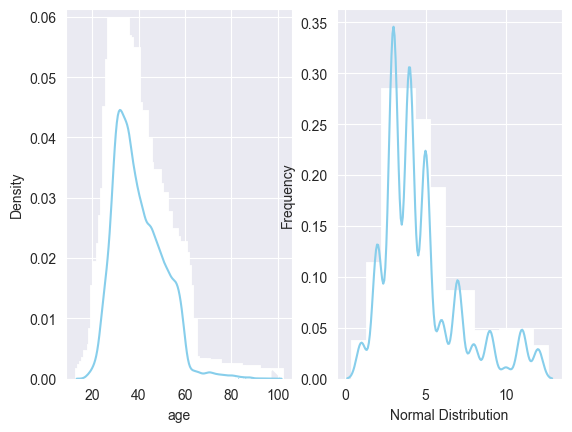

In [22]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
ax = sns.distplot(df1['age'],
                  bins=100,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})

plt.subplot(1, 2, 2) # index 2

ax = sns.distplot(df1['job'],
                  bins=12,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})               
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

plt.show()